# Exercise 3

## Part A

In [30]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import pandas as pd
import stan

import nest_asyncio
nest_asyncio.apply()

In [2]:
stan_code = """
data {
  int<lower=0> n;          // Sample size 
  vector[n] X;             // Data
  real<lower=0> sigma;     // Standard deviation for data
  real theta_mean;         // Prior mean for theta
  real<lower=0> theta_std; // Prior standard deviation for theta
}
parameters {
  real theta;              // Unknown mean
}
model {
  theta ~ normal(theta_mean, theta_std); // Prior
  X ~ normal(theta, sigma);              // Likelihood
}
"""

stan_data = {"n": 20,
            'X': np.array( [-0.02, -0.03, 0.82, -1.05, -0.76, 0.46, -0.06, 0.34, -0.08, -0.24, 1.43, 1.07, -2.5 , 1.48, 2.16, 1.23, -0.21, -0.69, 0.73, -0.62] ),
            'sigma': 1,
            'theta_mean': 0,
            'theta_std': 0.4}

posterior = stan.build(stan_code, data=stan_data, random_seed=0)

Building...



Building: found in cache, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!


                count       mean       std        min        25%        50%  \
parameters                                                                    
lp__           4000.0 -11.249884  0.660339 -17.822522 -11.413485 -10.998231   
accept_stat__  4000.0   0.915635  0.127394   0.101288   0.885182   0.970967   
stepsize__     4000.0   1.039585  0.175090   0.905819   0.919676   0.957315   
treedepth__    4000.0   1.387750  0.487298   1.000000   1.000000   1.000000   
n_leapfrog__   4000.0   2.433000  1.137029   1.000000   1.000000   3.000000   
divergent__    4000.0   0.000000  0.000000   0.000000   0.000000   0.000000   
energy__       4000.0  11.750536  0.962747  10.769633  11.064155  11.452608   
theta          4000.0   0.131720  0.191363  -0.601255  -0.000501   0.129651   

                     75%        max  
parameters                           
lp__          -10.823960 -10.769370  
accept_stat__   1.000000   1.000000  
stepsize__      1.077224   1.337889  
treedepth__     2.0

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


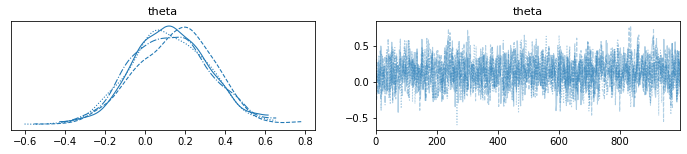

In [3]:
fit = posterior.sample(num_chains=4, num_samples=1000)

df = fit.to_frame()

print(df.describe().T)
print(az.summary(fit))

az.plot_trace(fit, var_names=("theta"))

plt.show()

## Part B

In [12]:
stan_code_b = """
data {
  int<lower=0> n;          // Sample size 
  vector[n] X;             // Data
  real theta_mean;         // Prior mean for theta
  real<lower=0> theta_std; // Prior standard deviation for theta
  real sigma_alpha;
  real sigma_beta;
}
parameters {
  real theta;              // Unknown mean
  real<lower=0> sigma;     // Unknown standard deviation
}
model {
  theta ~ normal(theta_mean, theta_std); // Prior
  sigma ~ gamma(sigma_alpha, sigma_beta); // sigma prior
  X ~ normal(theta, sigma);              // Likelihood
}
"""

stan_data_b = {'n': 20,
            'X': np.array( [-0.02, -0.03, 0.82, -1.05, -0.76, 0.46, -0.06, 0.34, -0.08, -0.24, 1.43, 1.07, -2.5 , 1.48, 2.16, 1.23, -0.21, -0.69, 0.73, -0.62] ),
            'sigma': 1,
            'theta_mean': 0,
            'theta_std': 0.4,
            'sigma_alpha': 2,
            'sigma_beta': 2}

posterior_b = stan.build(stan_code_b, data=stan_data_b, random_seed=0)

Building...

In file included from /usr/local/lib/python3.10/dist-packages/httpstan/include/stan/model/indexing.hpp:5,
                 from /usr/local/lib/python3.10/dist-packages/httpstan/include/stan/model/model_header.hpp:17,
                 from /home/vyeoms/.cache/httpstan/4.8.2/models/dtrgm2xh/model_dtrgm2xh.cpp:2:
/usr/local/lib/python3.10/dist-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp: In function ‘void stan::model::assign(Mat1&&, const Mat2&, const char*, const stan::model::index_multi&, const stan::model::index_multi&)’:
/usr/local/lib/python3.10/dist-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp:401:9: warning: typedef ‘using pair_type = struct std::pair<int, std::vector<int, stan::math::arena_allocator<int> > >’ locally defined but not used [-Wunused-local-typedefs]
  401 |   using pair_type = std::pair<int, arena_vec>;
      |         ^~~~~~~~~
/home/vyeoms/.cache/httpstan/4.8.2/models/dtrgm2xh/model_dtrgm2xh.cpp: In instantiation of ‘void mode


Building: 30.1s, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/httpstan_5zb5l7qt/model_dtrgm2xh.stan', line 16, column 2 to column 41)
  If this warning occurs sporadically, su

                count       mean       std        min        25%        50%  \
parameters                                                                    
lp__           4000.0 -13.743310  1.021086 -25.713472 -14.126892 -13.439826   
accept_stat__  4000.0   0.931085  0.088232   0.265602   0.900900   0.964339   
stepsize__     4000.0   0.772429  0.049652   0.708513   0.733415   0.774090   
treedepth__    4000.0   2.108000  0.661018   1.000000   2.000000   2.000000   
n_leapfrog__   4000.0   4.314000  2.099644   1.000000   3.000000   3.000000   
divergent__    4000.0   0.000000  0.000000   0.000000   0.000000   0.000000   
energy__       4000.0  14.719347  1.420401  12.760268  13.699879  14.401830   
theta          4000.0   0.128766  0.209237  -0.743909  -0.005912   0.132657   
sigma          4000.0   1.086317  0.171006   0.652713   0.968154   1.066504   

                     75%        max  
parameters                           
lp__          -13.026077 -12.746370  
accept_stat__   

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


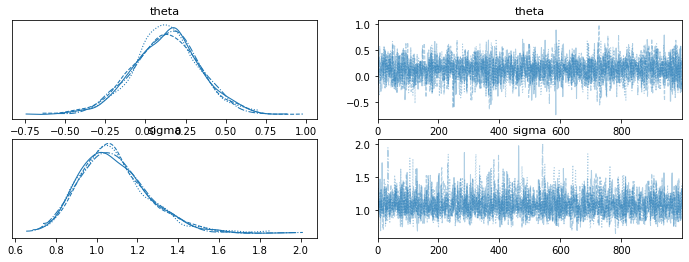

In [15]:
fit_b = posterior_b.sample(num_chains=4, num_samples=1000)

df_b = fit_b.to_frame()

print(df_b.describe().T)
print(az.summary(fit_b))

az.plot_trace(fit_b, var_names=("theta", "sigma"))

plt.show()

# Exercise 4

## Part A

In [17]:
stan_code = """
data {
  int<lower=0> n;            // Sample size 
  vector[n] X;               // Predictors
  vector[n] Y;               // Responses
  real beta_mean;            // beta prior mean
  real<lower=0> beta_std;    // beta prior std
  real<lower=0> sigma_alpha; // sigma prior parameter alpha
  real<lower=0> sigma_beta;  // sigma prior parameter beta
}
parameters {
  real beta0;                // Intercept
  real beta1;                // Coefficient for X
  real<lower=0> sigma;       // Standard deviation
}
model {
  beta0 ~ normal(beta_mean, beta_std);    // Prior for beta0
  beta1 ~ normal(beta_mean, beta_std);    // Prior for beta1
  sigma ~ gamma(sigma_alpha, sigma_beta); // Prior for sigma
  Y ~ normal(beta0 + beta1 * X, sigma);   // Likelihood
}
"""

X = np.array( [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] )
Y = np.array( [1.06, 2.07, 2.97, 4.01, 5.13, 5.92, 6.91, 0.00, 9.15, 9.90] )

stan_data = {'n': 10,
             'X': X,
             'Y': Y,
             'beta_mean': 0,
             'beta_std': 1,
             'sigma_alpha': 0.1,
             'sigma_beta': 1 }

posterior = stan.build(stan_code, data=stan_data, random_seed=0)

Building...



Building: found in cache, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/httpstan_8dkb22f5/model_kfotcmjf.stan', line 19, column 2 to column 41)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either sever

                count       mean       std        min        25%        50%  \
parameters                                                                    
lp__           4000.0 -17.341152  1.227098 -26.233856 -17.890050 -17.035612   
accept_stat__  4000.0   0.930228  0.099385   0.134010   0.909396   0.967517   
stepsize__     4000.0   0.472725  0.005707   0.465974   0.469090   0.471695   
treedepth__    4000.0   2.556000  0.622865   1.000000   2.000000   3.000000   
n_leapfrog__   4000.0   6.867000  3.334830   1.000000   5.000000   7.000000   
divergent__    4000.0   0.000000  0.000000   0.000000   0.000000   0.000000   
energy__       4000.0  18.825155  1.746086  15.824295  17.590359  18.499777   
beta0          4000.0   0.255701  0.843491  -2.420183  -0.309332   0.251502   
beta1          4000.0   0.786674  0.168153  -0.073420   0.677319   0.784332   
sigma          4000.0   2.336999  0.485705   1.254676   1.989112   2.264247   

                     75%        max  
parameters   

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


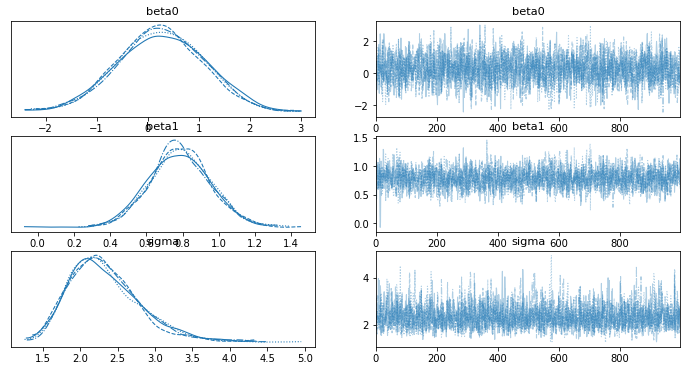

In [18]:
fit = posterior.sample(num_chains=4, num_samples=1000)

df = fit.to_frame()

print(df.describe().T)
print(az.summary(fit))

az.plot_trace(fit, var_names=("beta0", "beta1", "sigma"))

plt.show()

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


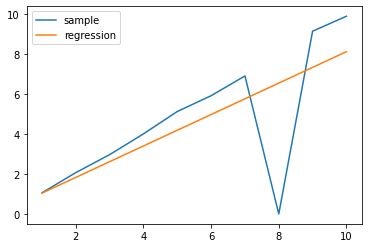

In [26]:
fit_data = az.summary(fit)
beta0 = fit_data['mean']['beta0']
beta1 = fit_data['mean']['beta1']

plt.plot(X, Y, label='sample')
plt.plot(X, beta1*X + beta0, label='regression')

plt.legend()

plt.show()

## Part B

In [28]:
stan_code = """
data {
  int<lower=0> n;            // Sample size 
  vector[n] X;               // Predictors
  vector[n] Y;               // Responses
  real beta_mean;            // beta prior mean
  real<lower=0> beta_std;    // beta prior std
  real<lower=0> sigma_alpha; // sigma prior parameter alpha
  real<lower=0> sigma_beta;  // sigma prior parameter beta
  real<lower=0> epsilon_dof; // degrees of freedom for student distribution
  real epsilon_mean;         // epsilon prior mean
  real<lower=0> epsilon_std; // epsilon std
}
parameters {
  real beta0;                // Intercept
  real beta1;                // Coefficient for X
  real epsilon;              // Noise term
  real<lower=0> sigma;       // Standard deviation
}
model {
  beta0 ~ normal(beta_mean, beta_std);    // Prior for beta0
  beta1 ~ normal(beta_mean, beta_std);    // Prior for beta1
  sigma ~ gamma(sigma_alpha, sigma_beta); // Prior for sigma
  epsilon ~ student_t(epsilon_dof, epsilon_mean, epsilon_std);
  Y ~ normal(epsilon + beta0 + beta1 * X, sigma);   // Likelihood
}
"""

stan_data = {'n': 10,
             'X': X,
             'Y': Y,
             'beta_mean': 0,
             'beta_std': 1,
             'sigma_alpha': 0.1,
             'sigma_beta': 1,
             'epsilon_dof': 3,
             'epsilon_mean': 0,
             'epsilon_std': 1}

posterior = stan.build(stan_code, data=stan_data, random_seed=0)

Building...

In file included from /usr/local/lib/python3.10/dist-packages/httpstan/include/stan/model/indexing.hpp:5,
                 from /usr/local/lib/python3.10/dist-packages/httpstan/include/stan/model/model_header.hpp:17,
                 from /home/vyeoms/.cache/httpstan/4.8.2/models/6yqxukij/model_6yqxukij.cpp:2:
/usr/local/lib/python3.10/dist-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp: In function ‘void stan::model::assign(Mat1&&, const Mat2&, const char*, const stan::model::index_multi&, const stan::model::index_multi&)’:
/usr/local/lib/python3.10/dist-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp:401:9: warning: typedef ‘using pair_type = struct std::pair<int, std::vector<int, stan::math::arena_allocator<int> > >’ locally defined but not used [-Wunused-local-typedefs]
  401 |   using pair_type = std::pair<int, arena_vec>;
      |         ^~~~~~~~~
/home/vyeoms/.cache/httpstan/4.8.2/models/6yqxukij/model_6yqxukij.cpp: In instantiation of ‘void mode


Building: 33.3s, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/tmp/httpstan_0drnu6nv/model_6yqxukij.stan', line 23, column 2 to column 41)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either s

                count       mean       std        min        25%        50%  \
parameters                                                                    
lp__           4000.0 -17.930509  1.511352 -27.434435 -18.653113 -17.594332   
accept_stat__  4000.0   0.912839  0.124517   0.080233   0.892078   0.959347   
stepsize__     4000.0   0.411386  0.026092   0.382381   0.387147   0.410908   
treedepth__    4000.0   2.954000  0.650377   1.000000   3.000000   3.000000   
n_leapfrog__   4000.0   9.069000  4.268231   1.000000   7.000000   7.000000   
divergent__    4000.0   0.000000  0.000000   0.000000   0.000000   0.000000   
energy__       4000.0  19.906176  2.094876  16.105465  18.374817  19.552504   
beta0          4000.0   0.189281  0.893272  -3.171173  -0.407852   0.182287   
beta1          4000.0   0.763927  0.194203  -0.096289   0.638738   0.759843   
epsilon        4000.0   0.224643  0.986201  -4.630790  -0.401035   0.214873   
sigma          4000.0   2.348648  0.500912   1.31274

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


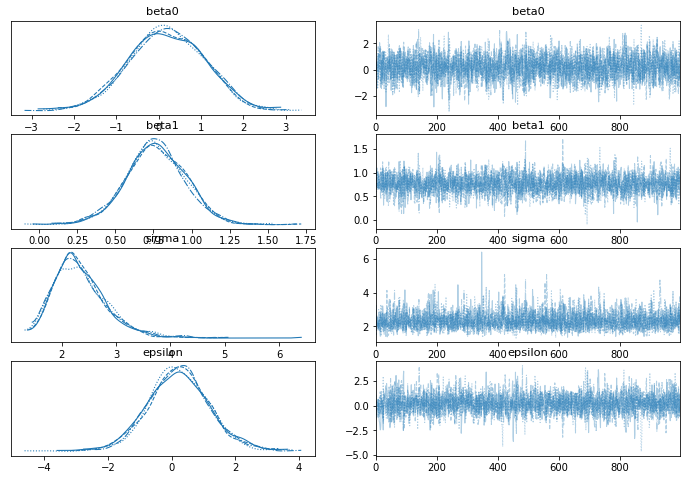

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


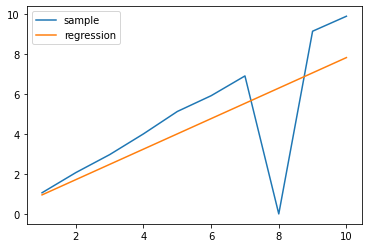

In [29]:
fit = posterior.sample(num_chains=4, num_samples=1000)

df = fit.to_frame()

print(df.describe().T)
print(az.summary(fit))

az.plot_trace(fit, var_names=("beta0", "beta1", "sigma", "epsilon"))

plt.show()

fit_data = az.summary(fit)
beta0 = fit_data['mean']['beta0']
beta1 = fit_data['mean']['beta1']
epsilon = fit_data['mean']['epsilon']

plt.plot(X, Y, label='sample')
plt.plot(X, beta1*X + beta0, label='regression')

plt.legend()

plt.show()

# Exercise 5

## Part A

In [40]:
radon_data = pd.read_csv( "https://www.cs.helsinki.fi/u/ahonkela/teaching/stats4ds/data/radon.txt", sep="\t" )
levels = radon_data["log_radon"].to_numpy()
floors = radon_data["floor"].to_numpy()

stan_code = """
data {
  int<lower=0> n;            // Sample size 
  vector[n] X;               // Predictors
  vector[n] Y;               // Responses
  real beta_mean;            // beta prior mean
  real<lower=0> beta_std;    // beta prior std
  real<lower=0> sigma_alpha; // sigma prior parameter alpha
  real<lower=0> sigma_beta;  // sigma prior parameter beta
  real<lower=0> epsilon_dof; // degrees of freedom for student distribution
  real epsilon_mean;         // epsilon prior mean
  real<lower=0> epsilon_std; // epsilon std
}
parameters {
  real beta0;                // Intercept
  real beta1;                // Coefficient for X
  real epsilon;              // Noise term
  real<lower=0> sigma;       // Standard deviation
}
model {
  beta0 ~ normal(beta_mean, beta_std);    // Prior for beta0
  beta1 ~ normal(beta_mean, beta_std);    // Prior for beta1
  sigma ~ gamma(sigma_alpha, sigma_beta); // Prior for sigma
  epsilon ~ student_t(epsilon_dof, epsilon_mean, epsilon_std);
  Y ~ normal(epsilon + beta0 + beta1 * X, sigma);   // Likelihood
}
"""

stan_data = {'n': levels.size,
             'X': floors,
             'Y': levels,
             'beta_mean': 0,
             'beta_std': 1,
             'sigma_alpha': 0.1,
             'sigma_beta': 1,
             'epsilon_dof': 3,
             'epsilon_mean': 0,
             'epsilon_std': 1}

posterior = stan.build(stan_code, data=stan_data, random_seed=0)